In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("https://raw.githubusercontent.com/nurfianqodar/skripsi/refs/heads/main/Pengamatan.ods",
                   sheet_name="pengamatan")

In [4]:
df.sample(5)

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4
101,2025-08-11,F,2,33.2,35.6,35.8,37.7
17,2025-08-08,D,3,11.1,11.1,10.6,9.9
62,2025-08-10,A,3,36.3,34.4,40.0,35.1
6,2025-08-08,B,2,12.7,11.7,13.8,10.3
40,2025-08-09,E,5,21.7,22.3,21.6,19.4


In [5]:
df_with_diameter = df
df_with_diameter["diameter"] = df_with_diameter[["diameter_1", "diameter_2", "diameter_3", "diameter_4"]].mean(axis=1)

In [6]:
df_with_diameter

,tanggal,p,u,diameter_1,diameter_2,diameter_3,diameter_4,diameter
0,2025-08-08,A,1,8.9,8.8,9.0,9.1,8.950
1,2025-08-08,A,2,11.6,12.0,12.6,11.9,12.025
2,2025-08-08,A,3,10.9,10.0,9.4,10.8,10.275
3,2025-08-08,A,4,9.6,10.0,10.2,10.6,10.100
4,2025-08-08,A,5,10.4,11.6,9.8,10.9,10.675
...,...,...,...,...,...,...,...,...
115,2025-08-11,E,5,37.9,38.8,38.0,36.1,37.700
116,2025-08-11,A,1,47.0,47.8,50.8,48.4,48.500
117,2025-08-11,A,4,49.0,51.4,52.8,50.0,50.800
118,2025-08-11,F,5,35.1,35.6,36.0,33.9,35.150


In [8]:
df_clean = df_with_diameter.groupby(by=["tanggal", "p"]).agg({
    "diameter": "mean"
}).reset_index()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

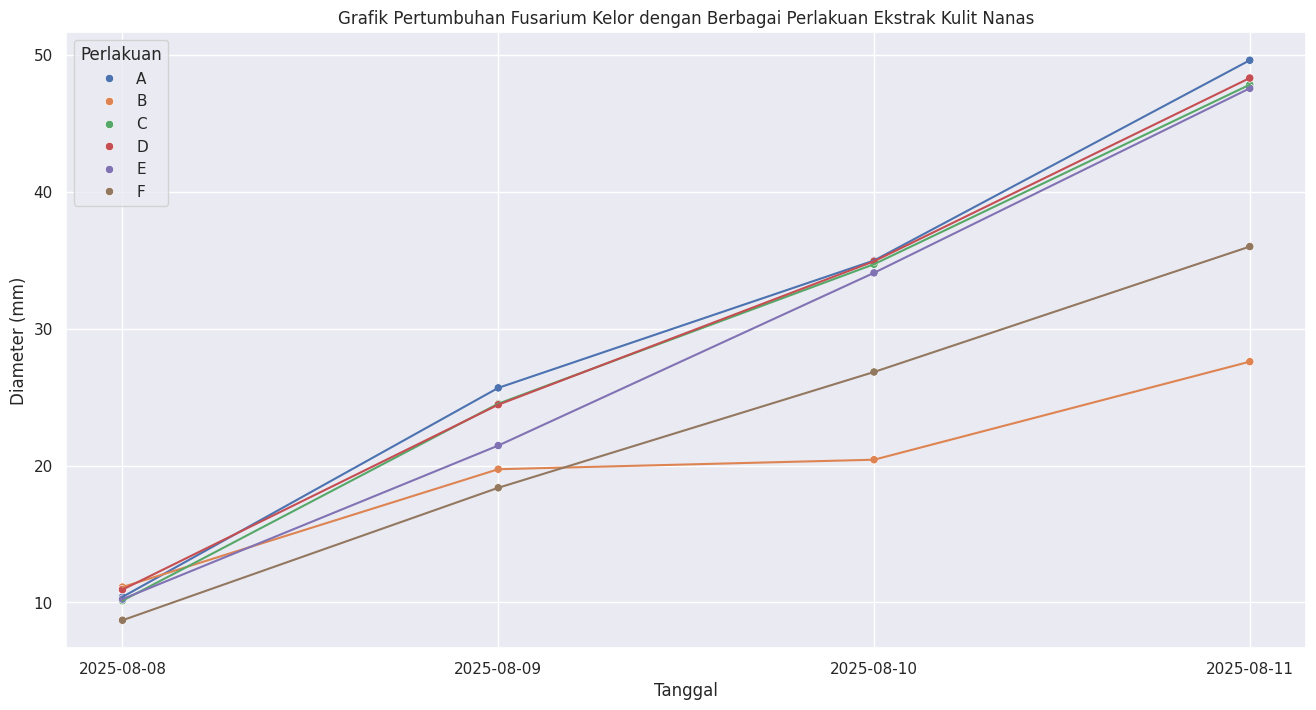

In [25]:
plt.figure(figsize=(16, 8))

sns.set_theme("notebook")
sns.lineplot(data=df_clean, x="tanggal", y="diameter", hue="p", legend=None)
sns.scatterplot(data=df_clean, x="tanggal", y="diameter", hue="p")

plt.title("Grafik Pertumbuhan Fusarium Kelor dengan Berbagai Perlakuan Ekstrak Kulit Nanas")
plt.ylabel("Diameter (mm)")
plt.xlabel("Tanggal")
plt.legend(title="Perlakuan")
plt.xticks(ticks=df_clean["tanggal"].unique())

plt.show()

In [16]:
df_clean.loc[df_clean["p"] == "B"]

,tanggal,p,diameter
1,2025-08-08,B,11.125
7,2025-08-09,B,19.735
13,2025-08-10,B,20.430
19,2025-08-11,B,27.595
